In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score  
from sklearn.preprocessing import QuantileTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split  
from sklearn.svm import SVC  
import seaborn as sns # for data visualization  
import matplotlib.pyplot as plt # to plot data visualization charts  
from collections import Counter  
import os  

In [7]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.shape

(768, 9)

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data['Outcome']=data['Outcome'].map({True:1,False:0})

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,NaN
1,1,85,66,29,0,26.6,0.351,31,NaN
2,8,183,64,0,0,23.3,0.672,32,NaN
3,1,89,66,23,94,28.1,0.167,21,NaN
4,0,137,40,35,168,43.1,2.288,33,NaN


In [12]:
data.Outcome.value_counts()

Series([], Name: Outcome, dtype: int64)

In [13]:
# checking correlation
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,NaN
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,NaN
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,NaN
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,NaN
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,NaN
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,NaN
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,NaN
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

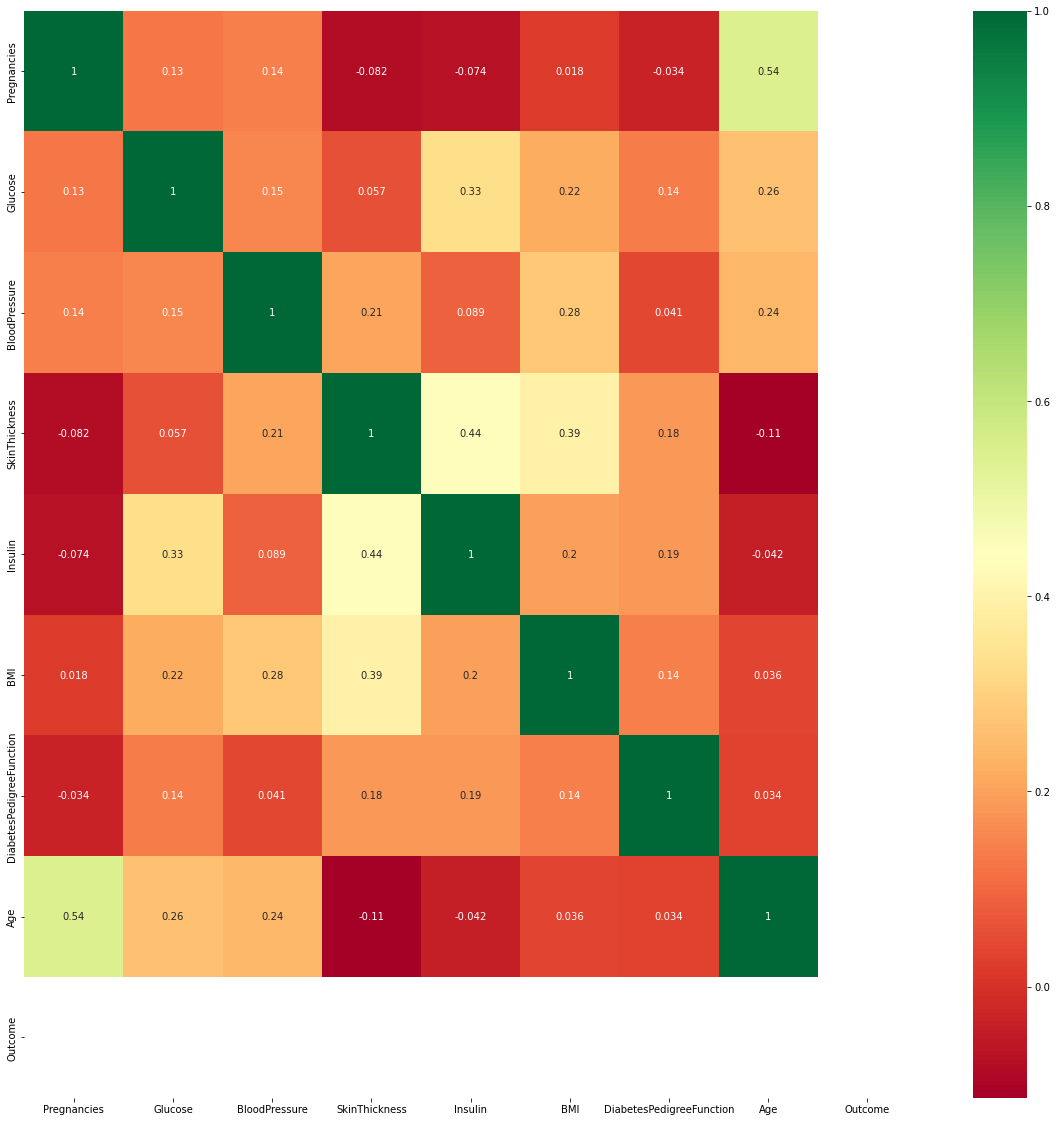

In [14]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [15]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                     float64
dtype: object

In [31]:
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].median())  
  
# Filling 0 values of Blood Pressure  
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].median())   
  
# Replacing 0 values in BMI  
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())  
  
# Replacing the missing values of Insulin and SkinThickness  
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())  
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())  
data.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,NaN
1,1,85,66,29.000000,79.799479,26.6,0.351,31,NaN
2,8,183,64,20.536458,79.799479,23.3,0.672,32,NaN
3,1,89,66,23.000000,94.000000,28.1,0.167,21,NaN
4,0,137,40,35.000000,168.000000,43.1,2.288,33,NaN


Text(0.5, 1.0, 'Correlation heatmap')

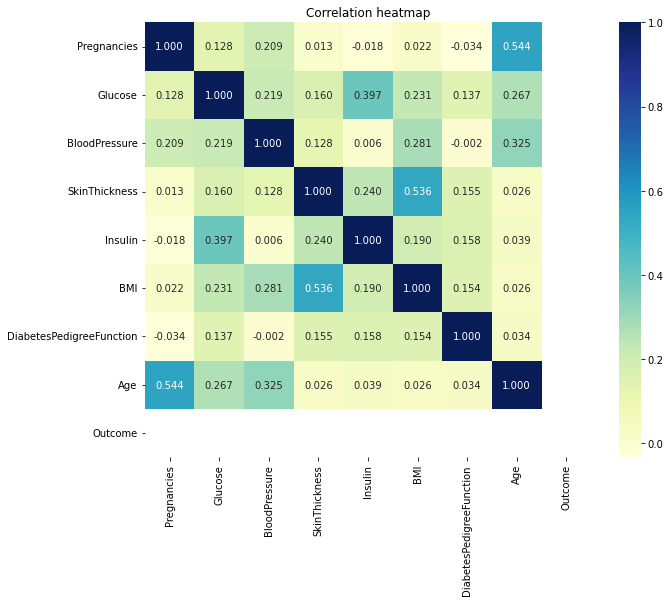

In [33]:
plt.figure(figsize = (10, 8))  
sns.heatmap(data.corr(), annot = True, fmt = ".3f", cmap = "YlGnBu")  
plt.title("Correlation heatmap")  

In [32]:
from sklearn.preprocessing import QuantileTransformer  
quartile  = QuantileTransformer()  
X = quartile.fit_transform(data)  
dataset = quartile.transform(X)  
dataset = pd.DataFrame(X)  
dataset.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  
# Showing the top 5 rows of the transformed dataset  
dataset.head()  

C:\anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
C:\anaconda\lib\site-packages\numpy\lib\nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
C:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.494133,0.801825,0.380052,0.591265,0.750978,0.889831,NaN
1,0.232725,0.091265,0.290091,0.644720,0.380052,0.213168,0.475880,0.558670,NaN
2,0.863755,0.956975,0.233377,0.308996,0.380052,0.077575,0.782269,0.585398,NaN
3,0.232725,0.124511,0.290091,0.505867,0.662973,0.284224,0.106258,0.000000,NaN
4,0.000000,0.721643,0.005215,0.801825,0.834420,0.926988,0.997392,0.606258,NaN


In [34]:
X = data.drop(["Outcome"], axis = 1)  
Y = data["Outcome"]  
  
# Splitting the dataset into the training and testing dataset  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 10)  
  
# Printing the size of the training and testing dataset  
print("The size of the training dataset: ", X_train.size)  
print("The size of the testing dataset: ", X_test.size)  

The size of the training dataset:  3680
The size of the testing dataset:  2464


In [37]:
def cv_model(models):  
    """ 
    We will create a list of machine learning models and print graphs of cross-validation scores with the help of mean accuracy. 
    """  
      
    # Cross validating the model using the Kfold stratified cross-validation method  
    k_fold = StratifiedKFold(n_splits = 15)  
      
    r = []  
    for m in models :  
        r.append(cross_val_score(estimator = m, X = X_train, y = Y_train, scoring = "accuracy", cv = k_fold, n_jobs = 4))  
  
    cross_val_means = []  
    cross_val_std = []  
    for result in r:  
        cross_val_means.append(result.mean())  
        cross_val_std.append(result.std())  
  
    df_result = pd.DataFrame({  
        "CrossValMean": cross_val_means,  
        "CrossValStd": cross_val_std,  
        "Model List":[  
            "DecisionTreeClassifier",  
            "LogisticRegression",  
            "SVC",  
            "AdaBoostClassifier",  
            "GradientBoostingClassifier",  
            "RandomForestClassifier",  
            "KNeighborsClassifier"  
        ]  
    })  
    
    bar_plot = sns.barplot(x = cross_val_means, y = df_result["Model List"].values, data = df_result)  
    bar_plot.set_xlabel("Mean of Cross Validation Accuracy Scores")  
    bar_plot.set_title("Cross Validation Scores of Models")  
    return df_result 

In [43]:
state = 20  
models_list = [  
    DecisionTreeClassifier(random_state = 1234),  
    LogisticRegression(random_state = 1234, solver ='liblinear'),  
    SVC(random_state = 1234),  
    AdaBoostClassifier(DecisionTreeClassifier(random_state = 1234), random_state = 1234, learning_rate = 0.3),  
    GradientBoostingClassifier(random_state = 1234),  
    RandomForestClassifier(random_state = 1234),  
    KNeighborsClassifier()  
]  
cv_model(models_list) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [35]:
lg=LogisticRegression(random_state = 123, solver ='liblinear')

In [36]:
lg.fit(X_train,Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [30]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state = 1234) 
lg.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Hyperparameter optimization
from sklearn.model_selection import RandomizedSearchCV

params={
    'n_estimators':[10,20,30,40,50,60,70,80,90,100,250,500,750,1000],
    'criterion':['gini','entropy'], 
    'max_depth':[3,4,5,6,8,10,12,15], 
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True, False],
}

random_search=RandomizedSearchCV(RFC,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,random_state=10)

In [ ]:
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
classifier=RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',random_state=10)

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred=classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
# try for xgboost
from xgboost import XGBClassifier

In [ ]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05,0.10,0.15,0.20,0.25,0.30] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

classifier=XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,random_state=10)

In [ ]:
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_estimator_

In [ ]:
classifier=XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.05)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_test,y_test,cv=10)

In [ ]:
score

In [ ]:
score.mean()

In [ ]:
classifier.fit(X_train,y_train)

In [ ]:
y_pred=classifier.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

In [ ]:
print(metrics.classification_report(y_test,y_pred))

In [ ]:
# dump model
import pickle

In [ ]:
Pkl_Filename = "ml_model.pkl"  
with open(Pkl_Filename,'wb') as file:  
    pickle.dump(classifier,file)

In [ ]:
from xgboost import Booster
Booster.save_model